# **Producto Integrador de Aprendizaje**

### Equipo 02 - Grupo 002

### Frecuencia: Miércoles 7pm-10pm

### Integrantes:
##### 1802920	Juarez Rodríguez Flor Karina 
##### 1815973	Mendoza Álvarez Pilar Abigail 
##### 1802473	Ordaz Ruiz Margarita


# **“Suicide Rates Overview 1985 to 2016”**

## Limpieza de Datos

Lo primero que necesitamos para comenzar a trabajar con la base de datos es importar las librerías que nos ayudarán en el proceso de limpieza de datos y leer nuestra base de datos, nuestro tipo de archivo es un csv *(Coma Separated Value)*, para esto ocupamos el siguiente código:

In [16]:
import pandas as pd
import numpy as np

from google.colab import files
files.upload()
datos = pd.read_csv("SUICIDIOS.csv")

Saving SUICIDIOS.csv to SUICIDIOS (2).csv


A continuación se muestran los primeros 5 renglones de nuestra base de datos sin manipulación.

In [17]:
datos.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


El siguiente paso fue eliminar las columnas que no necesitamos, para optimizar el código, en este caso decidimos eliminar la columna  _**population**_ esto debido a que ya tiene el porcentaje de suicidios por población así que sería redundante, la columna _**country-year**_ porque al igual que la columna *population* es redundante, pues ya tenemos tanto el país como el año,  _**HDI for year**_ debido a que no es útil para nuestros objetivos y la columna _**gdp_for_year**_ esto porque preferimos basarnos en la columna _**gdp_per_capita**_.

Para esto utilizamos la función *drop()*, cabe mencionar que estos cambios decidimos almacenarnos en otra variable, para poder seguir teniendo nuestros datos originales.

In [18]:
ds = datos.drop(['country-year','population',' gdp_for_year ($) ','HDI for year'],axis = 1)
ds.head()

,country,year,sex,age,suicides_no,suicides/100k pop,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,3.28,796,Boomers


Ahora vamos a cambiarle el nombre a las columnas para que nos sea más fácil manipular los datos.

In [19]:
ds.rename(columns={'suicides/100k pop':'porcentaje_suicidios',
                     'gdp_per_capita ($)':'per_capita'},
               inplace=True)

ds.head()

,country,year,sex,age,suicides_no,porcentaje_suicidios,per_capita,generation
0,Albania,1987,male,15-24 years,21,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,3.28,796,Boomers


Otro detalle que notamos es que los datos del 2016 están incompletos, y eso afectaba la parte de la visualización, así que decidimos eliminar las filas que tuvieran el año 2016.

In [20]:
ds = ds.drop(ds[ds['year']==2016].index)

Lo siguiente es ver si nuestra base contiene datos nulos, a simple vista no se ve ninguno, pero lo verficamos con la siguiente función:

In [21]:
ds.isnull().any()

country                 False
year                    False
sex                     False
age                     False
suicides_no             False
porcentaje_suicidios    False
per_capita              False
generation              False
dtype: bool

Ahora procederemos a guardar estos datos en un nuevo archivo csv.

In [22]:
ds.to_csv('Datos_Suicidios_limpios.csv', index=False)

Como hemos visto tenemos muchos datos y esto nos dificulta el estudio estadístico de los mismos así que decidimos agrupar los datos por edades, esto porque nos interesa ver como es que varían los números de suicidios de acuerdo a las edades. Para esto primero vemos cuales son los valores únicos de edades.

In [23]:
edad = ds.age.unique()
print(edad)

['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


Después con un ciclo for le asignamos cada agrupación de datos por rango de año a los elementos de una lista.

In [24]:
col = []
for i in range(0,6):
    col.append(ds[ds['age']==edad[i]])

col[0].head()

,country,year,sex,age,suicides_no,porcentaje_suicidios,per_capita,generation
0,Albania,1987,male,15-24 years,21,6.71,796,Generation X
2,Albania,1987,female,15-24 years,14,4.83,796,Generation X
13,Albania,1988,male,15-24 years,17,5.33,769,Generation X
17,Albania,1988,female,15-24 years,8,2.71,769,Generation X
28,Albania,1989,male,15-24 years,12,3.71,833,Generation X


## Estadística básica

- Para la estadística básica decidimos usar la función *describe()* dado que ésta nos arroja un resumen estadístico de una columna que en este caso fue la de *suicides_no*

In [25]:
ds['suicides_no'].describe()

count    27660.000000
mean       243.413485
std        904.490185
min          0.000000
25%          3.000000
50%         25.000000
75%        132.000000
max      22338.000000
Name: suicides_no, dtype: float64


-Lo que nos pareció más relevante de este resumen estadístico fueron los valores mínimo y máximo ya que nos muestra que los datos tiene mucha variabilidad, lo que nos reafirma que es más conveniente trabajar por agrupaciones.

- Dado que los valores tienen mucho variabilidad, decidimos ver que tanto varían por rango de edad.

**$$5-14$$**

In [26]:
col[5]['suicides_no'].describe()

count    4610.000000
mean       11.337093
std        30.907550
min         0.000000
25%         0.000000
50%         2.000000
75%         8.000000
max       404.000000
Name: suicides_no, dtype: float64

**$$15-24$$**

In [27]:
col[0]['suicides_no'].describe()

count    4610.000000
mean      175.129501
std       523.256414
min         0.000000
25%         6.000000
50%        33.000000
75%       120.000000
max      6945.000000
Name: suicides_no, dtype: float64

**$$25-34$$**

In [28]:
col[3]['suicides_no'].describe()

count     4610.000000
mean       243.349675
std        763.770222
min          0.000000
25%          8.000000
50%         42.000000
75%        154.750000
max      10310.000000
Name: suicides_no, dtype: float64

**$$35-54$$**

In [29]:
col[1]['suicides_no'].describe()

count     4610.000000
mean       530.667028
std       1646.488573
min          0.000000
25%         12.000000
50%         87.000000
75%        343.000000
max      22338.000000
Name: suicides_no, dtype: float64

**$$55-74$$**

In [30]:
col[4]['suicides_no'].describe()

count     4610.000000
mean       358.726247
std       1020.669146
min          0.000000
25%          5.000000
50%         56.000000
75%        244.000000
max      11431.000000
Name: suicides_no, dtype: float64

**$$75+$$**

In [31]:
col[2]['suicides_no'].describe()

count    4610.000000
mean      141.271367
std       365.940282
min         0.000000
25%         1.000000
50%        19.000000
75%        94.000000
max      3171.000000
Name: suicides_no, dtype: float64

-De los resúmenes estadísticos obtenidos por rango de edad podemos concluir dos cosas, la primera es que efectivamente cada rango tiene la misma cantidad de elementos y la segunda es que podemos ver que su variabilidad es más aceptable y fácil de manejear si se compara con la obtenida en la columna de suicides_no.
    
$$$$
Esto nos ayuda a ver la gran utilidad que será trabajar en agrupaciones y dado que es un proceso repetitivo decidimos no obtener los resúmenes estadísticos de todas las agrupaciones a utilizar pero se mostrarán gráficamente más adelante.

- Además, decidimos aplican la función *skew()* para obtener el valor de asimetría de la columna *suicides_no*

In [32]:
ds['suicides_no'].skew()

10.325864499495285


-Como el valor de asimetría es mayor que 1 y por lo tanto positivo, podemos decir que la columna tiene una distribución extremadamente sesgada a la izquierda y ésto se confirmará con las gráficas.

## Visualización de datos

Importamos las librerías que vamos a utilizar para realizar las gráficas.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #https://plotly.com/python/plotly-express/

El gráfico que se presenta a continuación muestra nuestros datos divididos por rango de edades y separados por sexo.

Text(0.5, 1.0, 'Gráfica 1: Número de suicidios por sexo y edad')

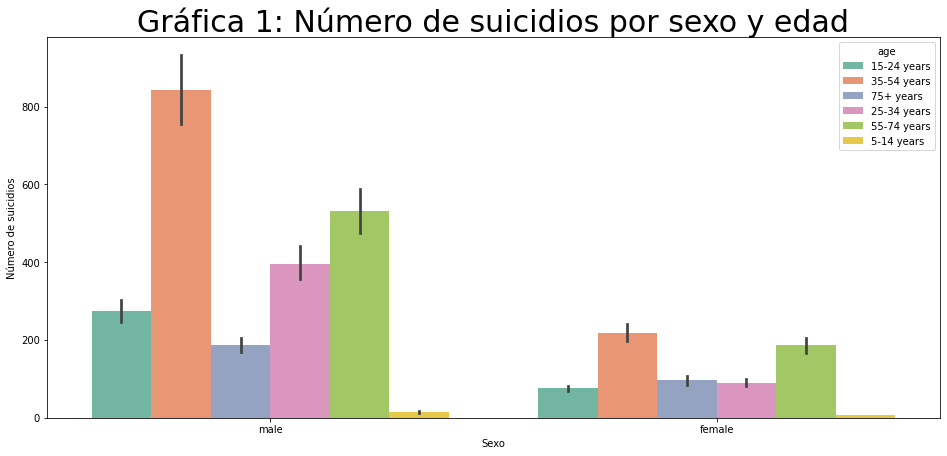

In [34]:
plt.figure(figsize=(16,7))
gb_edad = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = ds, palette='Set2')

plt.xlabel('Sexo')
plt.ylabel('Número de suicidios')
plt.title('Gráfica 1: Número de suicidios por sexo y edad',size = 30)

Como podemos ver en el gráfico anterior los hombres son el género con un mayor número de suicidios y además el rango de edad donde hay más suicidios es entre los 35 y 54 años de edad seguido por los de 55-74 años.

Ahora, buscando los países con mayor número de suicidios nos apoyamos en el siguiente mapa. 

In [35]:
#para este gráfico se INSTALA e IMPORTA la libreria plotly 
mapita = ds.groupby(by=['country']).agg({"suicides_no": ['sum']})
mapita.columns = ['total_suicidios']
mapita.reset_index(inplace=True)
mapita

fig = px.choropleth(mapita, locations="country", locationmode='country names',
                    color="total_suicidios", 
                    hover_name="country", 
                    color_continuous_scale='sunset') 

fig.update_layout(
    title="Gráfica 2: Mapa de suicidios (1985 - 2015)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple" 
    )
)

fig.show()

Como vemos, Rusia es el país con mayor número de suicidios a nivel mundial, así que decidimos ver sí en este país existía una relación significativa entre el Pib per cápita y el número de suicidios. <br>
Lo primero que hicimos fue hacer una agrupación del número de suicidios por año en Rusia.

In [36]:
rusia = ds.groupby(by=['country', 'year', 'per_capita']).agg({"suicides_no": ['sum']})
rusia.columns = ["total_suicide"]
rusia.reset_index(inplace=True)
   
gdp_cn = rusia[rusia['country'] == 'Russian Federation']
    
gdp_cn.head()

,country,year,per_capita,total_suicide
1733,Russian Federation,1989,3740,37921
1734,Russian Federation,1990,3789,39028
1735,Russian Federation,1991,3773,39281
1736,Russian Federation,1992,3333,45923
1737,Russian Federation,1993,3160,55846


Después de haber obtenido esta agrupación decidimos realizar un diagrama de dispersión  de estos datos para identificar de manera gráfica si existe una realación entre dichas variables.

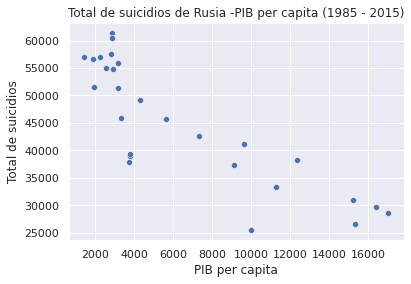

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
sns.scatterplot(x="per_capita", y="total_suicide", data=gdp_cn)
plt.title("Total de suicidios de Rusia -PIB per capita (1985 - 2015)")
plt.xlabel('PIB per capita')
plt.ylabel('Total de suicidios')

plt.show()

Al visualizar la gráfica de dispersión notamos que esta sugiere una relación cuadrática negativa entre ambas variables, así que decidimos utilizar la técnica de _"Regresión"_ con el método de mínimos cuadrados con la ayuda de la librería statsmodel, para determinar si la relación era significativa o no. 

Link de la librería: https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLSResults.html

In [38]:
import statsmodels.api as sm
gdp_cn['per_capita_2'] = gdp_cn['per_capita']**2
reg2 = sm.OLS.from_formula('total_suicide ~ per_capita + per_capita_2', data=gdp_cn).fit()
print(reg2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                            OLS Regression Results                            
Dep. Variable:          total_suicide   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     38.67
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           3.11e-08
Time:                        23:09:41   Log-Likelihood:                -270.26
No. Observations:                  27   AIC:                             546.5
Df Residuals:                      24   BIC:                             550.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      6.31e+04   3399.404     18.563   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ahora que ya tenemos los coeficientes del modelo y el valor p así que los guardamos en unas variables, para poder hacer las pruebas pertinentes. 

In [39]:
beta_0 = reg2.params[0]
beta_1 = reg2.params[1]
beta_2 = reg2.params[2]
array_x2 = np.array(gdp_cn['per_capita_2'])
array_x =np.array(gdp_cn['per_capita'])

print(beta_0, beta_1, beta_2)
valor_p = reg2.f_pvalue

63103.67691535627 -4.105034569670008 0.00012597967185445444


**Prueba de utilidad del modelo** <br>
Utilizamos un nivel de significancia del 5% ($\alpha=0.05$) y nuestras hipótesis son:

Hipótesis nula: $H_0: \beta_{1}=\beta_{2}=0$ <br>
Hipótesis alternativa: $H_{a}$: al menos $\beta_{i} \ne 0 \hspace{1mm} (i=1,2)$ <br>

In [40]:
alfa = 0.05
valor_p <= alfa

True

Como $ 3.113e^-.08 \leq 0.05 $

$\therefore$ _Se rechaza_ $H_0$, y se llega a la conclusión de que existe una relación cuadrática útil entre el número de suicidos y el PIB per cápita.

Ahora imprimimos el valor de nuestro coeficiente de determinación ($R_a^2$)

In [41]:
print(reg2.rsquared_adj)

0.7434324528550948


$$R_a^2=74.34%$$ <br>
Así que consideramos que nuestro modelo **sí** se ajusta ya que quiere decir que **74.34%** de la variación observada es explicada por la regresión.

Le asignamos el valor de $y$ a el número de suicidios y a $x$ el valor del pib per cápita, así que la ecuación de nuestro modelo es:

$$\hat {y} =  63103.6769 + -4.1050x + 0.0001x^2$$ 
Por último gráficamos nuestro modelo, 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



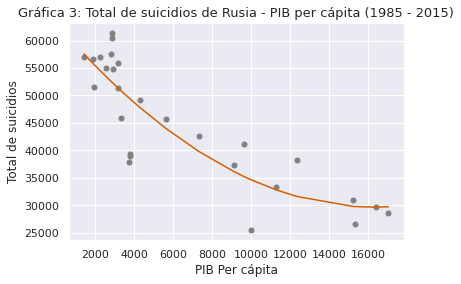

In [42]:
plt.scatter(x=gdp_cn['per_capita'], y=gdp_cn['total_suicide'],  marker='o', c='gray', s=25)
sns.set_color_codes('colorblind')
sns.lineplot(array_x, beta_0 + beta_1 * array_x + beta_2*array_x2,color = "r")
plt.title("Gráfica 3: Total de suicidios de Rusia - PIB per cápita (1985 - 2015)", size=13)
plt.xlabel("PIB Per cápita")
plt.ylabel("Total de suicidios")
plt.show()

Como podemos ver en la gráfica nuestro modelo sí tiene buen ajuste.

$$Segundo \space Objetivo$$
Por último, buscamos probar si los recursos económicos con los que cuenta el país influyen en el número de suicidios. 

Dado que Rusia es el país con más suicidios decidimos buscar cual es el año en el cual hubo más suicidios en este país.

C:\Users\JLN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

by argument to sort_index is deprecated, please use .sort_values(by=...)



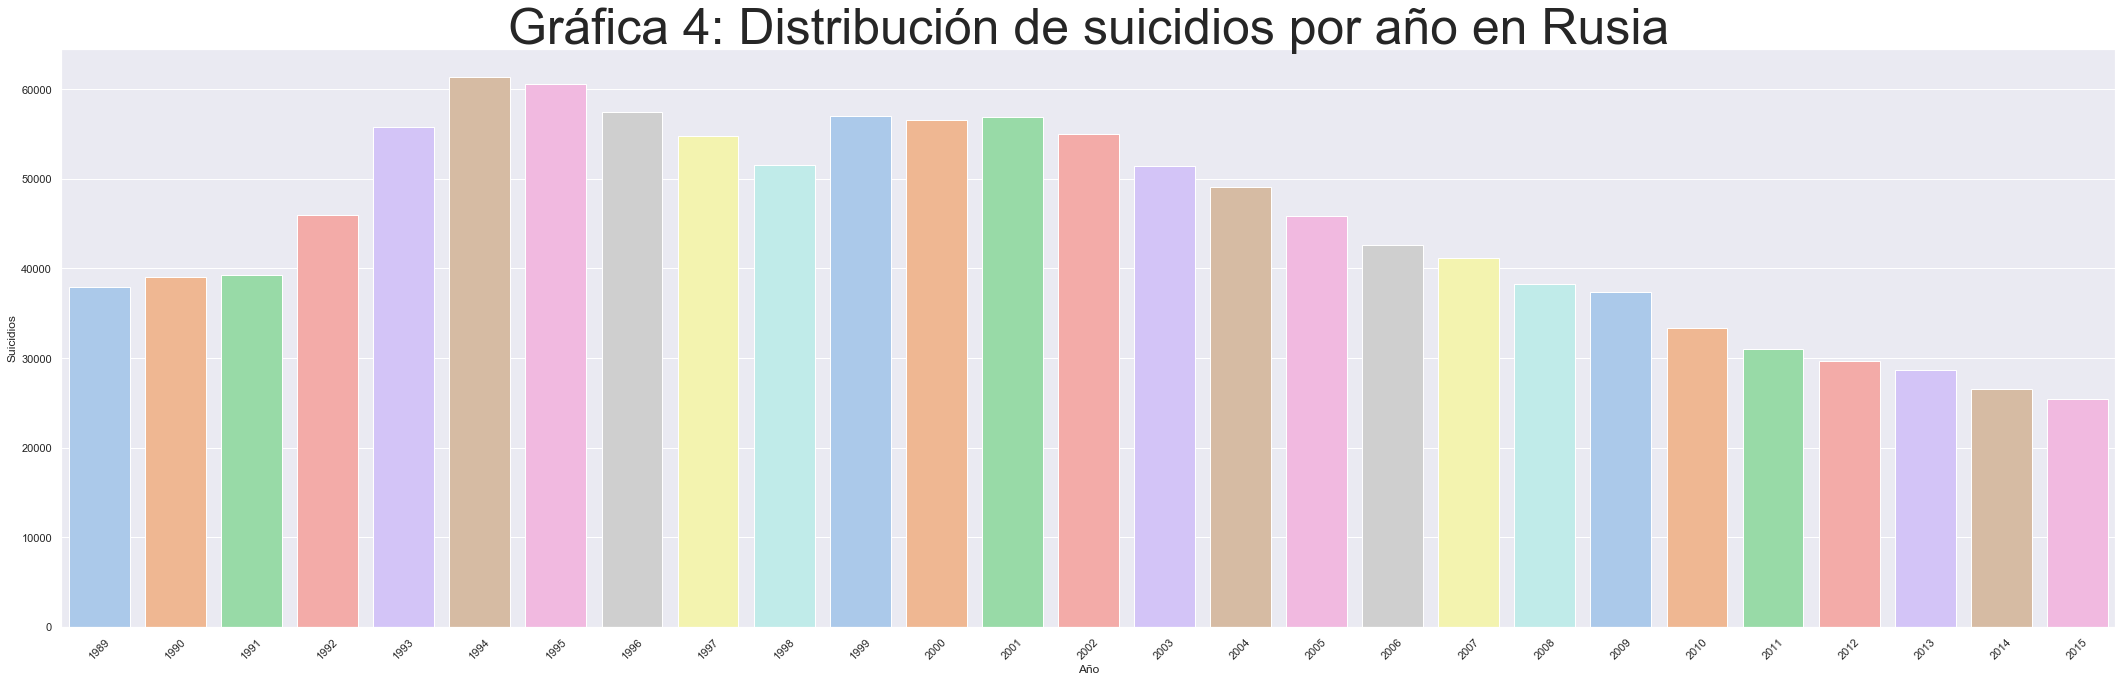

In [ ]:
S_year = pd.DataFrame(ds['suicides_no'].groupby([ds['country'],ds['year']]).sum())
S_year = S_year.reset_index().sort_index(by='suicides_no',ascending=False)
yr = S_year
fig = plt.figure(figsize=(30,10))
plt.title('Gráfica 4: Distribución de suicidios por año en Rusia',size = 50)

sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='year',data=yr[yr['country']=='Russian Federation'],palette='pastel');
plt.ylabel('Suicidios')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.tight_layout()

Como podemos observar el año que tuvo más porcentaje de suicidios fue 1994.

Esto nos ayudará para poder investigar desde un punto más especifico el contexto que se vivió en ese año para determinar si existieron algunas situaciones que detonaran este incremento. Esto con el fin, de poder tener una conclusión.